# **Assignment 2: Processing Datasets in Python**

Team:
- Alessandra Nayeli Arenas Escalante — 1994279 — N2  
- Andrea Victoria Carrizosa Bernal   — 2049922 — N2  
- Diego Iván Sánchez Vargas          — 2132200 — N2
- Perla Rubí Rodriguez Trejo         — 1997169 — N2

Class: AI  
Professor: Daniel Isaías López Páez  
Date: 05/09/2025


# **Introduction**

This work focuses on the analysis and visualization of a medical dataset to explore how data can be prepared for further use in machine learning models. The Pima Indians Diabetes dataset from Kaggle contains clinical information from patients, including attributes such as glucose levels, blood pressure, insulin, BMI, and age, along with the outcome indicating whether a patient has diabetes. Using Python in Google Colab and libraries such as Pandas, Numpy, and Matplotlib, the dataset is first examined to identify inconsistencies and missing values. These issues are then addressed through data cleaning and preprocessing, including replacing invalid values and normalizing numerical variables. Various visualizations, such as histograms, boxplots, scatter plots, and bar charts, are generated to understand distributions, detect outliers, and explore relationships between key variables.

# **Part 1: Data Loading and Exploration**

The pandas and numpy libraries are imported. the first is a library for data analysis and manipulation, as well as importing data from different formats, and is necessary because we are going to work with dataframes; the second will be used to perform numerical computations and matrix operations. In the third line of the first cell, matplotlib is also imported this is a library that allows the creation of plots such as histograms or scatter plots, making data visualization more efficient, the information is then loaded into a dataframe, and in the last line of the cell, the first 10 rows of the dataset are displayed.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


The function detects missing or null values within a dataframe that returns Boolean values, true if null or false if the value exists, and the use of .sum() adds the true values, which equal 1, and false values, which equal 0, showing how many null values there are in the columns.

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


The function is used that generates a table of true or false values indicating where there are values equal to zero by comparing each value in the dataframe. As in the previous cell, sum() adds the true values in each column to determine how many zeros a variable has.

In [ ]:
(df == 0).sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


Describe() function is used, which generates descriptive statistics, it calculates the number of data points, the mean, the standard deviation, the maximum and minimum values for each column, as well as the 25, 50, and 75 percentiles.

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **Part 2: Data Cleaning and Normalization**

The function of the first line of code is used to identify the columns where zeros should not be, as they are incorrect values, unlike the remaining columns where 0 is a valid value. The median, which is the central value of the data, is also calculated and will replace the zero values in the fourth line of code. Finally, the zeros are counted again as a verification method.

In [ ]:
cols_replace = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in cols_replace:
    median = df[col].median()
    df[col] = df[col].replace(0, median)

(df == 0).sum()

,0
Pregnancies,111
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,500


**Normalization**

This section of the code focuses on normalizing the dataset. To avoid modifying the original data, a copy of the dataframe is created. Then, using a loop, the code goes through each column and calculates its minimum and maximum values. With this information, it applies the min-max normalization formula, which rescales the values of each column so they fit within the range from 0 to 1. The result is stored in a new dataframe called df_scaled, which maintains the structure of the original dataset but with all its variables normalized. Finally, the first ten rows of this transformed dataset are displayed, allowing a quick verification of the changes. The purpose of this step is to standardize the data, ensuring that variables are comparable in scale.

In [ ]:
df_scaled = df.copy()
for col in df.columns:
    col_min = df[col].min()
    col_max = df[col].max()
    df_scaled[col] = (df[col] - col_min) / (col_max - col_min)

df_scaled.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0
5,0.294118,0.464516,0.510204,0.173913,0.019832,0.151329,0.052519,0.150000,0.0
6,0.176471,0.219355,0.265306,0.271739,0.088942,0.261759,0.072588,0.083333,1.0
7,0.588235,0.458065,0.489796,0.173913,0.019832,0.349693,0.023911,0.133333,0.0
8,0.117647,0.987097,0.469388,0.413043,0.635817,0.251534,0.034159,0.533333,1.0
9,0.470588,0.522581,0.734694,0.173913,0.019832,0.282209,0.065756,0.550000,1.0


# **Part 3: Data Visualization**

This part of the code helps us visualize glucose levels through histograms. The first histogram shows the distribution of glucose values in their original form, grouped into twenty intervals.
The second histogram repeats the visualization but uses the normalized glucose values instead, showing how the rescaling to a range between zero and one affects the data distribution. To make the comparison clearer, the code also produces a combined histogram where both the original and normalized glucose data are plotted together with different colors and slight transparency, so their overlap can be appreciated. This set of plots provides a visual comparison that highlights how normalization changes the scale of the values without altering the underlying shape of the distribution.

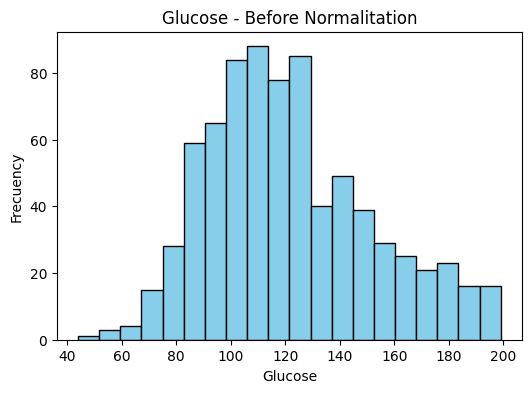

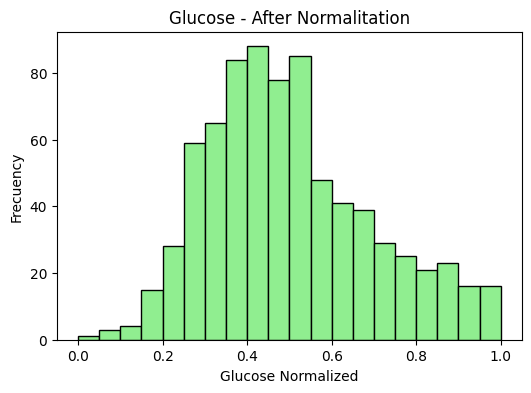

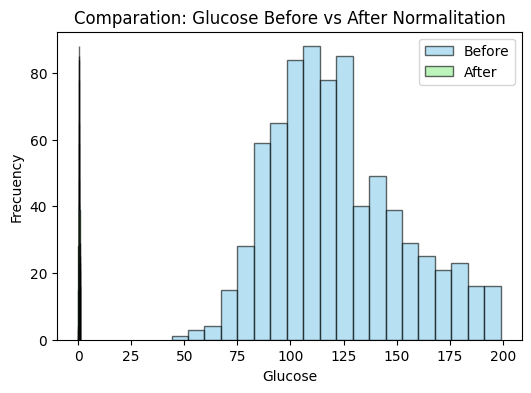

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(df['Glucose'], bins=20, color='skyblue', edgecolor='black')
plt.title('Glucose - Before Normalitation')
plt.xlabel('Glucose')
plt.ylabel('Frecuency')
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df_scaled['Glucose'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Glucose - After Normalitation')
plt.xlabel('Glucose Normalized')
plt.ylabel('Frecuency')
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df['Glucose'], bins=20, alpha=0.6, label='Before', color='skyblue', edgecolor='black')
plt.hist(df_scaled['Glucose'], bins=20, alpha=0.6, label='After', color='lightgreen', edgecolor='black')
plt.title('Comparation: Glucose Before vs After Normalitation')
plt.xlabel('Glucose')
plt.ylabel('Frecuency')
plt.legend()
plt.show()

Unlike the histogram, which shows frequency distributions, the boxplot summarizes the data distribution by emphasizing quartiles and potential outliers. The following portion of the code creates a boxplot.
It draws a box that represents the interquartile range, a line for the median, and whiskers that extend to cover most of the data. Points that fall far outside the whiskers are marked as outliers. By using this plot, it becomes possible to quickly detect abnormal blood pressure readings that deviate significantly from the rest of the dataset.

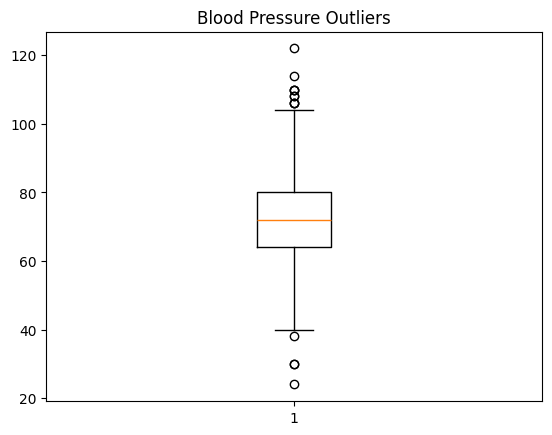

In [ ]:
plt.boxplot(df['BloodPressure'])
plt.title('Blood Pressure Outliers')
plt.show()

This section of the code generates a scatter plot to examine how glucose levels relate to body mass index (BMI).

Each patient in the dataset is represented as a point positioned according to their glucose and BMI values. To add more context, the dataset is divided based on the “Outcome” variable, which indicates whether the patient has diabetes or not. Points corresponding to patients without diabetes are drawn in blue, while those with diabetes are shown in red.

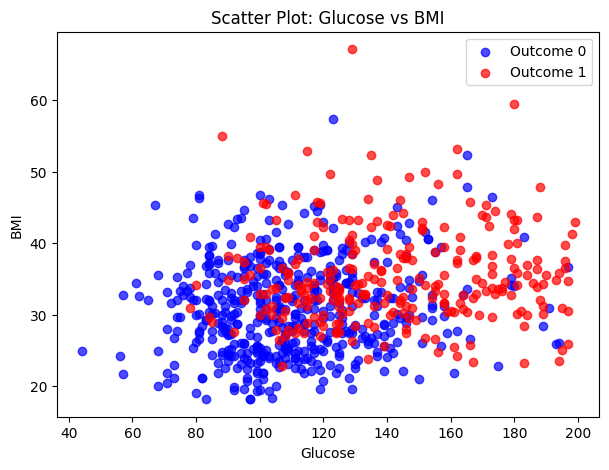

In [ ]:
colors = {0: "blue", 1: "red"}

plt.figure(figsize=(7,5))
for outcome in [0,1]:
    subset = df[df["Outcome"] == outcome]
    plt.scatter(subset["Glucose"], subset["BMI"],
                c=colors[outcome], label=f"Outcome {outcome}", alpha=0.7)

plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.title("Scatter Plot: Glucose vs BMI")
plt.legend()
plt.show()

Finally, this last section presents a bar chart summarizing the number of patients with and without diabetes. To build it, the code counts the occurrences of each outcome value in the dataset and represents them as two vertical bars. To improve readability, the bars are colored differently, and the numeric labels on the x-axis are replaced with descriptive text: “No Diabetes” and “Diabetes.”

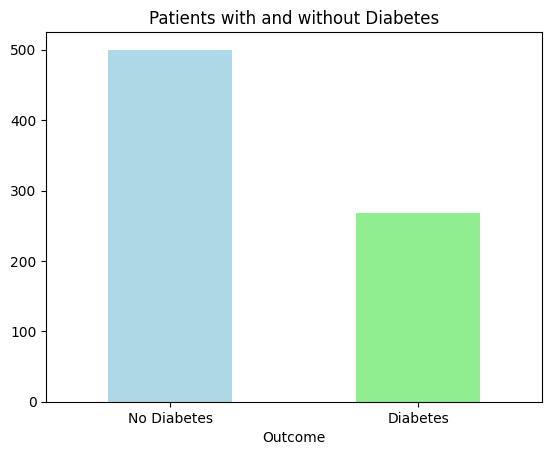

In [ ]:
df['Outcome'].value_counts().plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.xticks([0,1], ["No Diabetes", "Diabetes"], rotation=0)
plt.title("Patients with and without Diabetes")
plt.show()

# **Part 4: Answer the following questions**

*1. What impact do missing values have on data analysis?*

They can reduce the sample size and its statistical power. In other words, when a sample consists of 50 data points but 30 of those points are missing values, the actual sample size is only 20 data points. This can cause unreliable results and lead to erroneous conclusions.

*2. How can we detect and handle outliers in biomedical datasets?*

Box plots or scatter plots are commonly used, as well as statistical methods such as the Z-score method or the interquartile range method. This will allow us to assess whether they are caused by measurement errors, in which case they can be replaced by the median or the mean. If they are values that represent an unusual situation and are not linked to any sampling error, then these outliers are retained.

*3. What are some common causes of missing or incorrect data in biomedical studies?*

It is mainly caused by human error, such as failure to record or transcribe data correctly, or access to databases, as well as poorly calibrated or poorly maintained equipment, or staff who are not adequately trained in the use of medical equipment. In the case of patients, many refuse to answer certain questions or fail to follow the protocol for a medical study.

*4. How does normalizing data improve the performance of Machine Learning models?*

Normalization ensures the uniformity of numerical magnitudes, which prevents characteristics with higher values from dominating characteristics with more variable values. Using this method increases the model's performance and accuracy. If the features in a dataset have very different scales, during model training, the fitting algorithms may give more weight to features with larger values, which can negatively affect model performance. Data normalization solves this problem by ensuring that all features have similar value ranges.

*5. Why is visualizing data an important step before applying Machine Learning models?*

Visualizing data is a fundamental step before applying machine learning models because it transforms complex and often overwhelming datasets into interpretable visual forms such as charts, graphs, or maps. Machine learning relies heavily on data to make accurate predictions and decisions, but raw data in large volumes can be difficult to interpret directly. Visualization helps uncover hidden patterns, detect anomalies, and reveal relationships among variables that would otherwise remain unnoticed. This process not only aids in building a deeper understanding of the dataset but also informs the selection of appropriate models and preprocessing techniques. By providing insights into trends, distributions, and correlations, visualization ensures that data-driven decisions are based on a clearer understanding of the information, ultimately improving the performance and reliability of machine learning models.

*6. Why is preprocessing critical when working with medical datasets?*

Preprocessing is critical when working with medical datasets because these datasets are often large, diverse, and complex, containing various forms of noise such as missing values, outliers, and inconsistencies. With the growth of digitalization and the widespread availability of medical data through open access, research in predictive analytics has expanded dramatically. However, the usefulness of such data depends on its quality. If left unprocessed, errors and inconsistencies in medical datasets can distort the outcomes of analysis and compromise the accuracy of predictive models. Preprocessing ensures that the data is cleaned, refined, and standardized, making it suitable for further exploration and analysis.

*7. What ethical concerns should be considered when handling patient data?*

Ethical concerns in handling patient data include protecting privacy and confidentiality, ensuring informed consent, and preventing misuse by third parties. Breaches or poor governance can expose patients to exploitation, particularly as healthcare databases are increasingly sought by commercial entities. Transparency, strong security measures, and equitable use of data are essential to maintain trust and protect vulnerable populations.

# **Group Conclusion**

Through this assignment, it was possible to practice fundamental concepts of data processing using Python in Google Colab while working with a real medical dataset. By applying libraries such as Pandas, Numpy, and Matplotlib, the data was cleaned, normalized, and visualized in different ways. Tasks such as replacing inconsistent values, scaling variables, and creating visualizations like histograms, boxplots, scatter plots, and bar charts allowed for a practical approach to techniques that are crucial before using data in machine learning models. This assignment demonstrated the usefulness of Python for effective data analysis.


The reflection on questions about data preprocessing and ethical considerations marked the importance of both accuracy and responsibility in biomedical research. Handling missing values, detecting outliers, and normalizing data directly influence the reliability of predictive models, while ethical aspects ensure patient privacy in the use of medical information. In this way, the fundamental activity stress how programming tools, combined with data management, form the foundation for building reliable machine learning applications.
